In [6]:
import random
import matplotlib.pyplot as plt


In [31]:
def rollDice():
    roll=random.randint(1,100)
    if roll==100:
        return False
    if roll<=50:
        return False
    if 100>roll>50:
        return True
    

for i in range(100):
    result=rollDice()
    
    

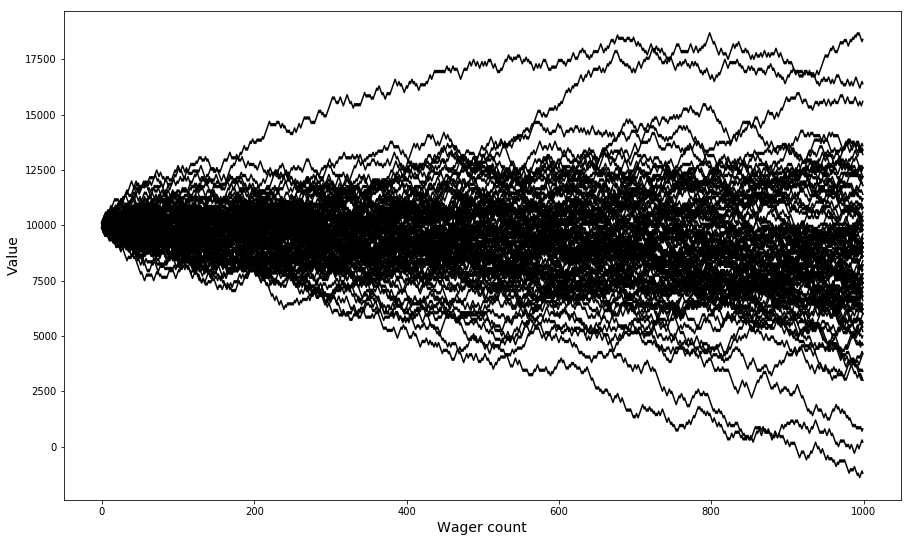

In [8]:
def simple_bettor(funds, initial_wager, wager_count):
    value=funds
    wager=initial_wager
    vY=[]
    
    
    for i in range(wager_count):
        if rollDice()==True:
            value+=wager
            vY.append(value)
        else:
            value-=wager
            vY.append(value)
    if value<=0:
        value="broke"
    plt.plot(vY,color="k")
    
plt.figure(figsize=(15,9))
plt.ylabel("Value",size=14)
plt.xlabel("Wager count",size=14)

for i in range(100):        
    simple_bettor(10000,100,1000)

double_profits: 0
double_busts: 0


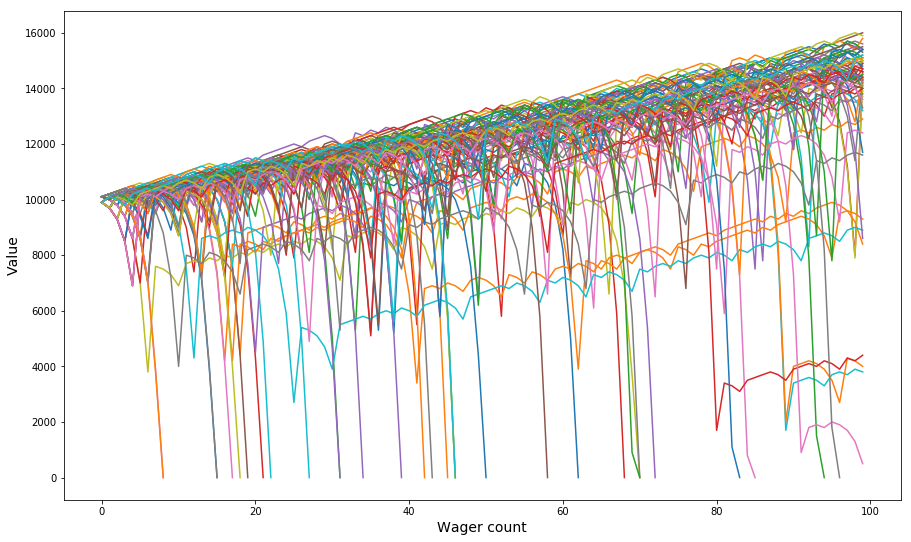

In [10]:
def double_bettor(funds, initial_wager, wager_count):
    value=funds
    wager=initial_wager
    vY=[]
    previousWager="win"
    previousWagerAmount=initial_wager
    global double_profits
    global double_busts

    
    
    for i in range(wager_count):
        if previousWager=="win":
            if rollDice()==True:
                value+=wager
                vY.append(value)
            else:
                previousWager="loss"
                value-=wager
                previousWagerAmount = wager
                vY.append(value)
                if value<=0:
                    double_busts+=1
                    break
                           
        
        elif previousWager=="loss":
            if rollDice()==True:
                wager=previousWagerAmount*2
                if (value-wager)<0:
                    wager=value
                value+=wager
                wager=initial_wager
                previousWager="win"
                vY.append(value)
            else:
                wager=previousWagerAmount*2
                if (value-wager)<0:
                    wager=value
                value-=wager
                previousWagerAmount=wager
                previousWager="loss"
                vY.append(value)
                if value<=0:
                    double_busts+=1
                    break
                    
    plt.plot(vY)
    if value > funds:
        double_profits+=1
    
    
    
plt.figure(figsize=(15,9))
plt.ylabel("Value",size=14)
plt.xlabel("Wager count",size=14)

#double_profits=0
#double_busts=0

print("double_profits:",double_profits)
print("double_busts:",double_busts)



for i in range(100):
    double_bettor(10000,100,100)
    

                
    

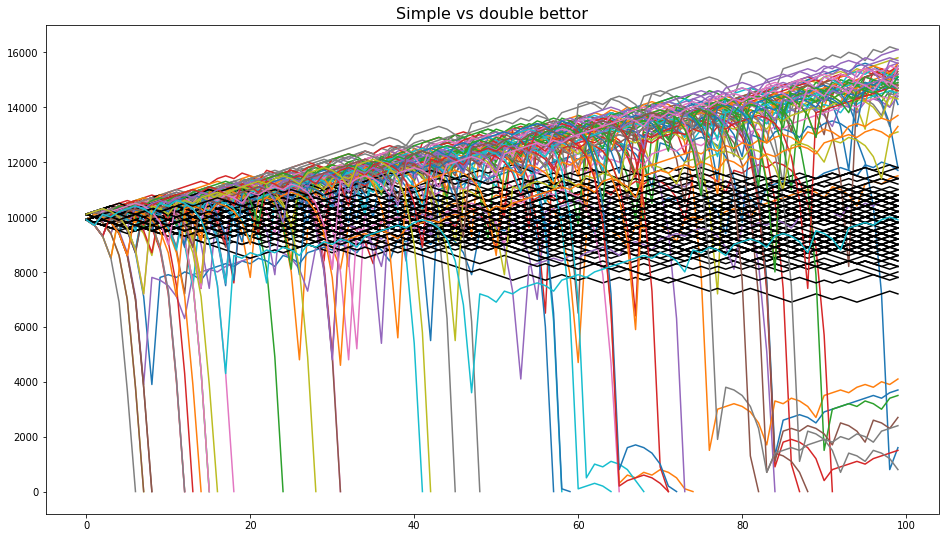

In [11]:
plt.figure(figsize=(16,9))
plt.title("Simple vs double bettor",size=16)
for i in range(100):
    simple_bettor(10000,100,100)
    double_bettor(10000,100,100)


In [53]:
def multiple_bettor(funds, initial_wager, wager_count):
    global multiple_profits
    global multiple_busts
    value=funds
    wager=initial_wager
    previousWager="win"
    vY=[]
    
    previousWagerAmount=initial_wager
    
    for i in range(wager_count):
        if previousWager=="win":
            if rollDice()==True:
                value+=wager
                vY.append(value)
            else:
                previousWager="loss"
                value-=wager
                previousWagerAmount = wager
                vY.append(value)
                if value<=0:
                    multiple_busts+=1
                    break
                           
        
        elif previousWager=="loss":
            if rollDice()==True:
                wager=previousWagerAmount*multiple
                if (value-wager)<0:
                    wager=value
                value+=wager
                wager=initial_wager
                previousWager="win"
                vY.append(value)
            else:
                wager=previousWagerAmount*multiple
                if (value-wager)<0:
                    wager=value
                value-=wager
                previousWagerAmount=wager
                previousWager="loss"
                vY.append(value)
                if value<=0:
                    multiple_busts+=1
                    break
                    
    #plt.plot(vY)
    if value > funds:
        multiple_profits+=1
        

multiple_profits=0
multiple_busts=0
lower_bound=100
upper_bound=0
random_multiple=[]

for multiple in range(1,10):
    multiple_profits=0
    multiple_busts=0
    for x in range(1000):
        multiple_bettor(10000,100,100)
    if multiple_profits>=upper_bound and multiple_busts<=lower_bound:
        random_multiple.append(multiple)
        
print(random_multiple)
    


[1]
